# Demo for the DoWhy causal API
We show a simple example of adding a causal extension to any dataframe. 

In [1]:
import os, sys
sys.path.append(os.path.abspath("../../../"))

In [2]:
import dowhy.datasets
import dowhy.api

import numpy as np
import pandas as pd

from statsmodels.api import OLS

In [3]:
data = dowhy.datasets.linear_dataset(beta=5,
        num_common_causes=1,
        num_instruments = 0,
        num_samples=1000,
        treatment_is_binary=True)
df = data['df']
df['y'] = df['y'] + np.random.normal(size=len(df)) # Adding noise to data. Without noise, the variance in Y|X, Z is zero, and mcmc fails.
#data['dot_graph'] = 'digraph { v ->y;X0-> v;X0-> y;}'

treatment= data["treatment_name"][0]
outcome = data["outcome_name"][0]
common_cause = data["common_causes_names"][0]
df

,W0,v0,y
0,-1.289334,False,-3.324194
1,-1.100803,False,-2.035903
2,-3.564829,False,-5.986921
3,-2.036167,False,-2.869478
4,-2.781469,False,-6.127631
...,...,...,...
995,-1.178597,True,2.965997
996,0.223498,True,4.161892
997,-2.582064,False,-3.472824
998,-1.998788,False,-0.725005


INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_identifier:Frontdoor variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume iid data.


<AxesSubplot:xlabel='v0'>

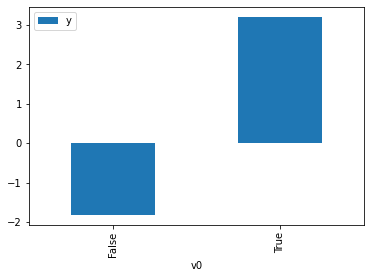

In [4]:
# data['df'] is just a regular pandas.DataFrame
df.causal.do(x=treatment,
                     variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'},
                     outcome=outcome,
                     common_causes=[common_cause],
                     proceed_when_unidentifiable=True).groupby(treatment).mean().plot(y=outcome, kind='bar')

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_identifier:Frontdoor variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume iid data.


<AxesSubplot:xlabel='v0'>

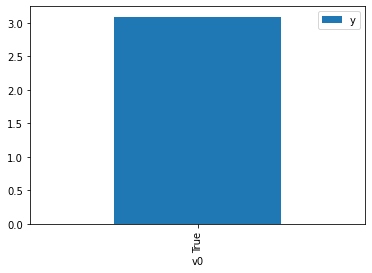

In [5]:
df.causal.do(x={treatment: 1}, 
              variable_types={treatment:'b', outcome: 'c', common_cause: 'c'}, 
              outcome=outcome,
              method='weighting', 
              common_causes=[common_cause],
              proceed_when_unidentifiable=True).groupby(treatment).mean().plot(y=outcome, kind='bar')

In [6]:
cdf_1 = df.causal.do(x={treatment: 1}, 
              variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'}, 
              outcome=outcome, 
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)

cdf_0 = df.causal.do(x={treatment: 0}, 
              variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'}, 
              outcome=outcome, 
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)


INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_identifier:Frontdoor variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume iid data.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_identifier:Frontdoor variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume 

In [7]:
cdf_0

,W0,v0,y,propensity_score,weight
0,-0.782669,False,-0.792179,0.825287,1.211700
1,-1.386957,False,-2.541074,0.943911,1.059422
2,-1.704419,False,-3.922381,0.970418,1.030484
3,-0.814005,False,-0.313702,0.834584,1.198202
4,0.029784,False,-0.307668,0.461182,2.168343
...,...,...,...,...,...
995,-0.587235,False,-0.086199,0.757990,1.319279
996,-0.518178,False,-0.673428,0.730369,1.369171
997,-0.285695,False,-2.356726,0.624268,1.601876
998,-1.146594,False,-4.006878,0.910335,1.098497


In [8]:
cdf_1

,W0,v0,y,propensity_score,weight
0,-2.094548,True,1.099802,0.013245,75.499593
1,-1.584775,True,1.996253,0.037724,26.508238
2,-2.287651,True,-0.454571,0.008865,112.808679
3,-2.287651,True,-0.454571,0.008865,112.808679
4,-0.427584,True,2.698249,0.308738,3.238989
...,...,...,...,...,...
995,1.803262,True,8.249998,0.979852,1.020562
996,-0.335329,True,4.826016,0.351590,2.844225
997,0.656759,True,8.514054,0.813633,1.229055
998,0.946281,True,5.565004,0.889192,1.124617


## Comparing the estimate to Linear Regression
First, estimating the effect using the causal data frame, and the 95% confidence interval.

In [9]:
(cdf_1['y'] - cdf_0['y']).mean()

In [10]:
1.96*(cdf_1['y'] - cdf_0['y']).std() / np.sqrt(len(df))

Comparing to the estimate from OLS.

In [11]:
model = OLS(np.asarray(df[outcome]), np.asarray(df[[common_cause, treatment]], dtype=np.float64))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              6276.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):                        0.00
Time:                        18:02:18   Log-Likelihood:                         -1436.6
No. Observations:                1000   AIC:                                      2877.
Df Residuals:                     998   BIC:                                      2887.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.8467      0.022     82.505      0.000       1.803       1.891
x2             5.0277      0.067     74.507      0.000       4.895       5.160
==============================================================================
Omnibus:                        0.268   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.874   Jarque-Bera (JB):                0.291
Skew:                           0.040   Prob(JB):                        0.864
Kurtosis:                       2.973   Cond. No.                         3.02
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""